## **Name:** Affan Zulfiqar
---
## **Reg No:** B22F0144AI050
---
## **Course:** DIP-LAB-08
---
## **Section:** AI22F-BLUE

## **LAB TASK:**
1. Load a grayscale image of your choice.
2. Apply and compare the following frequency domain techniques with different parameter values:
o Fourier Transform & Magnitude Spectrum: Compute the DFT, shift the zero frequency to the center, and
visualize the magnitude spectrum.
o Low-Pass Filtering (Smoothing): Apply different cutoff frequencies and compare how the level of blurring
changes.
o High-Pass Filtering (Sharpening): Experiment with different filter sizes and analyze how edge details are
enhanced.
o Inverse Fourier Transform: Convert filtered images back to the spatial domain and observe the
reconstructed results.
3. Experiment with multiple parameter settings and display results side by side for comparison.
4. Write brief observations explaining how different parameters impact the image processing results

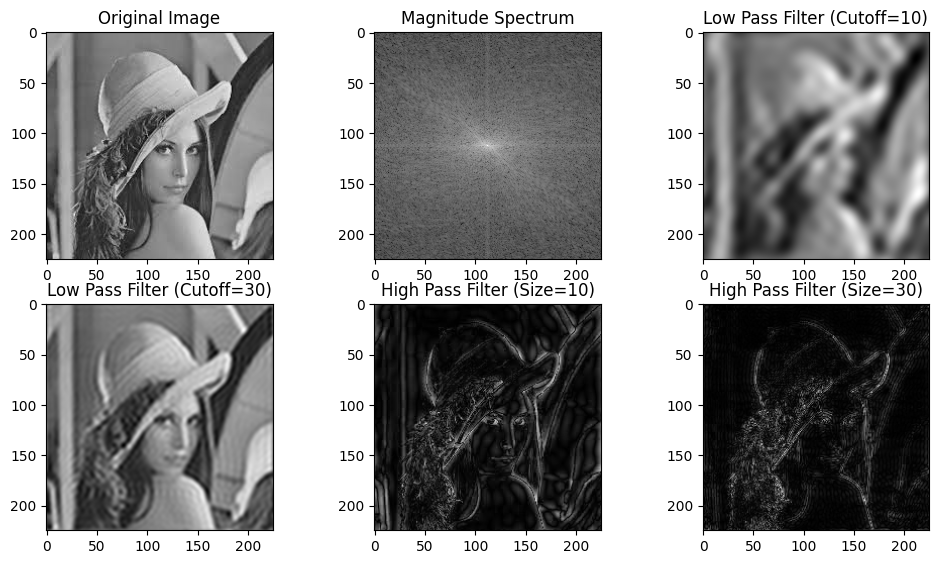

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading a lunen grayscale image
image = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)

# Computeing the DFT and magnitude spectrum
def compute_dft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

def low_pass_filter(dft_shift, cutoff):
    rows, cols = dft_shift.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    return dft_shift * mask

def high_pass_filter(dft_shift, size):
    rows, cols = dft_shift.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - size:crow + size, ccol - size:ccol + size] = 0
    return dft_shift * mask

def inverse_dft(dft_shift):
    f_ishift = np.fft.ifftshift(dft_shift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

dft, dft_shift, magnitude_spectrum = compute_dft(image)

# Here I appied different parameters for filters
low_pass_10 = low_pass_filter(dft_shift.copy(), 10)
low_pass_30 = low_pass_filter(dft_shift.copy(), 30)
high_pass_10 = high_pass_filter(dft_shift.copy(), 10)
high_pass_30 = high_pass_filter(dft_shift.copy(), 30)

# Inverse DFT
low_pass_img_10 = inverse_dft(low_pass_10)
low_pass_img_30 = inverse_dft(low_pass_30)
high_pass_img_10 = inverse_dft(high_pass_10)
high_pass_img_30 = inverse_dft(high_pass_30)

plt.figure(figsize=(12, 10))
plt.subplot(331), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(332), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.subplot(333), plt.imshow(low_pass_img_10, cmap='gray'), plt.title('Low Pass Filter (Cutoff=10)')
plt.subplot(334), plt.imshow(low_pass_img_30, cmap='gray'), plt.title('Low Pass Filter (Cutoff=30)')
plt.subplot(335), plt.imshow(high_pass_img_10, cmap='gray'), plt.title('High Pass Filter (Size=10)')
plt.subplot(336), plt.imshow(high_pass_img_30, cmap='gray'), plt.title('High Pass Filter (Size=30)')
plt.show()

# **Observations:**
**Low-Pass Filtering:**

**Cutoff = 10:** gives heavy smoothing, making the image very blurry and losing a lot of detail.

**Cutoff = 30:**  provides moderate smoothing, preserving some details while still reducing noise and sharpness.

**High-Pass Filtering:**

**Size = 10:** gives moderate sharpening. It brings out the edges and textures without making the image too harsh.

**Size = 30:** gives strong sharpening, almost like an edge-detection effect. It highlights fine details so much that the image becomes more abstract, and the overall structure can get lost.

**Conclusion:**

* Low-pass filtering smooths the image, removing noise and details, with stronger cutoff values retaining more detail.
* High-pass filtering enhances edges and textures, but with larger sizes, the image becomes more abstract and focused on fine details.
* Filter parameters depends on whether you want smoothing (low-pass filter) or sharpening (high-pass filter) effects in your image.

In [ ]:
!jupyter nbconvert --execute --to html /content/Affan_Zulfiqar_B22F0144AI050_DIP_LAB_08.ipynb

[NbConvertApp] Converting notebook /content/Affan_Zulfiqar_B22F0144AI050_DIP_LAB_08.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 767300 bytes to /content/Affan_Zulfiqar_B22F0144AI050_DIP_LAB_08.html
